In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

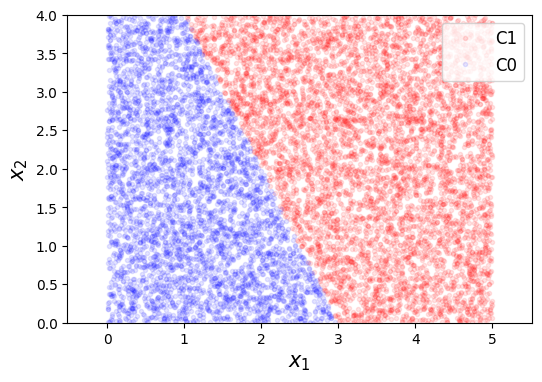

In [2]:
# data generation

m = 10000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_Y = 1/(1 + np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_Y == True)[0]
C0 = np.where(train_Y == False)[0]

train_Y = np.empty([m,1])
train_Y[C1] = 1
train_Y[C0] = 0

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.1, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.1, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
# plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

## Batch GD

In [3]:
LR = 0.05
n_iter = 10000

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype = tf.float32)
train_y = tf.constant(train_Y, dtype = tf.float32)

start_time = time.time()

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.sigmoid(tf.matmul(train_x, w))
        loss = - train_y*tf.math.log(y_pred) - (1-train_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

training_time = time.time() - start_time

w_hat = w.numpy()
print(w_hat)

[[-9.961741 ]
 [ 3.51868  ]
 [ 1.5478499]]


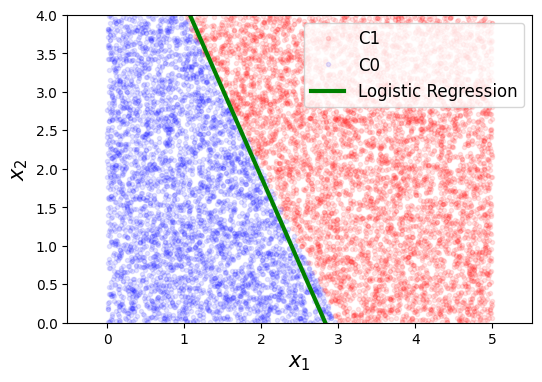

In [4]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.1, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.1, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

- **loss**

20.532033681869507


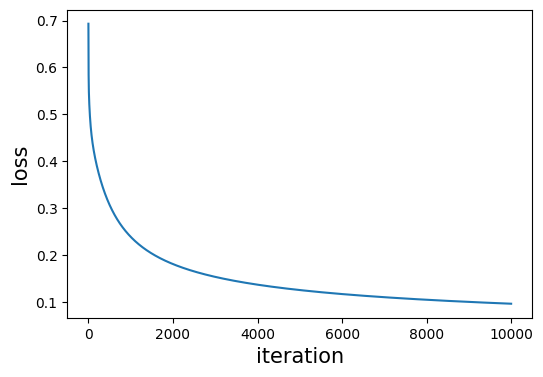

In [5]:
print(training_time)

plt.figure(figsize = (6, 4))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

## SGD

In [6]:
LR = 0.05
n_iter = 10000

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype = tf.float32)
train_y = tf.constant(train_Y, dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        idx = np.random.choice(m)
        batch_x = tf.expand_dims(train_x[idx,:], axis = 0)
        batch_y = tf.expand_dims(train_y[idx], axis = 0)

        y_pred = tf.sigmoid(tf.matmul(batch_x, w))
        loss = - batch_y*tf.math.log(y_pred) - (1-batch_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

[[-10.0747385]
 [  3.5739996]
 [  1.4802736]]


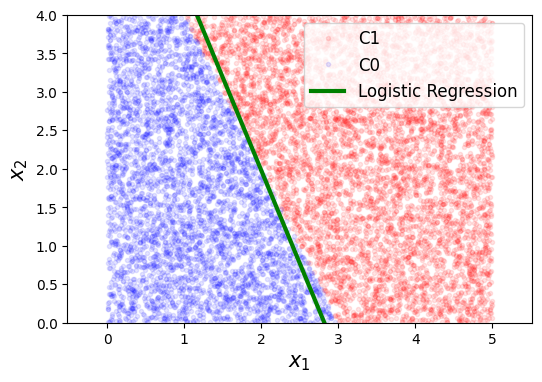

In [7]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.1, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.1, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

- **loss**

20.532033681869507


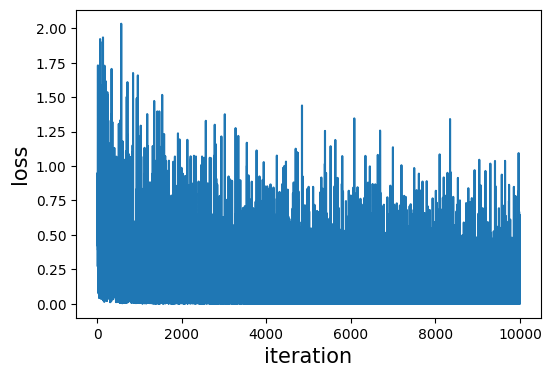

In [8]:
print(training_time)

plt.figure(figsize = (6, 4))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

## Mini-batch GD

In [9]:
LR = 0.05
n_iter = 10000
n_batch = 50

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        idx = np.random.choice(m, size = n_batch)
        batch_x = tf.constant(train_X[idx,:], dtype = tf.float32)
        batch_y = tf.constant(train_Y[idx], dtype = tf.float32)

        y_pred = tf.sigmoid(tf.matmul(batch_x, w))
        loss = - batch_y*tf.math.log(y_pred) - (1-batch_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

[[-9.961299 ]
 [ 3.528246 ]
 [ 1.5428611]]


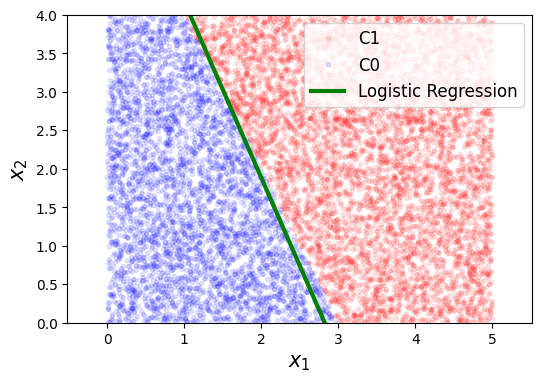

In [10]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'r.', alpha = 0.1, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'b.', alpha = 0.1, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

- **loss**

20.532033681869507


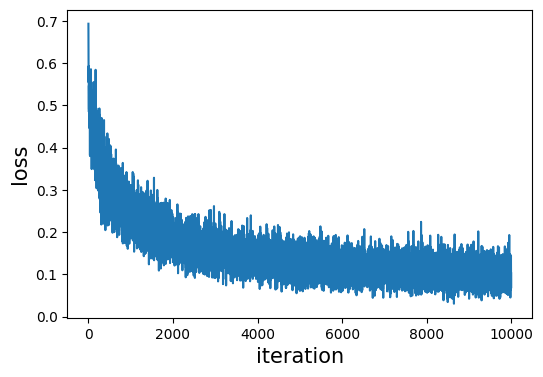

In [11]:
print(training_time)

plt.figure(figsize = (6, 4))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()